In [17]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast

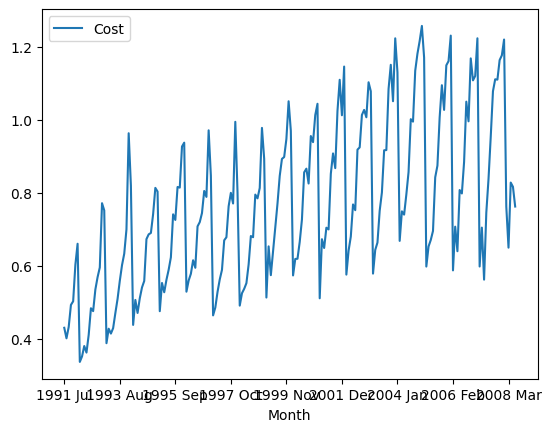

In [18]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [19]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


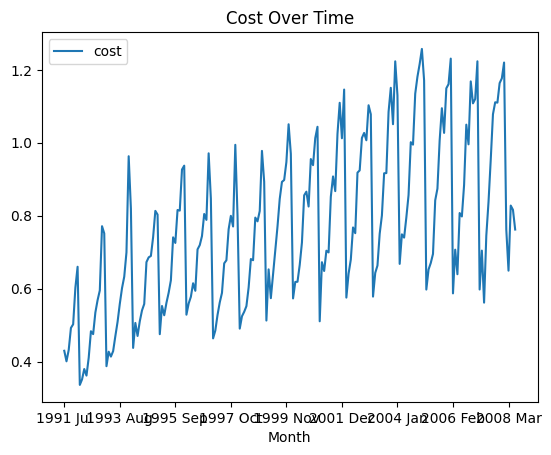

In [33]:
#section1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')
ap1.columns = ['cost']
ap1.plot(title='Cost Over Time')
plt.show()

In [21]:
#section2

result = adfuller(ap1['cost'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Critical Values: {'1%': np.float64(-3.465620397124192), '5%': np.float64(-2.8770397560752436), '10%': np.float64(-2.5750324547306476)}


In [22]:
#section3

diff = ap1.diff().dropna()
seasonal_diff = diff.diff(12).dropna()

result_diff = adfuller(seasonal_diff['cost'])
print("ADF Statistic (Diff+Seasonal):", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:", result_diff[4])

ADF Statistic (Diff+Seasonal): -5.07040327971582
p-value: 1.607283495966982e-05
Critical Values: {'1%': np.float64(-3.467631519151906), '5%': np.float64(-2.8779183721695567), '10%': np.float64(-2.575501353364474)}


<Figure size 1000x400 with 0 Axes>

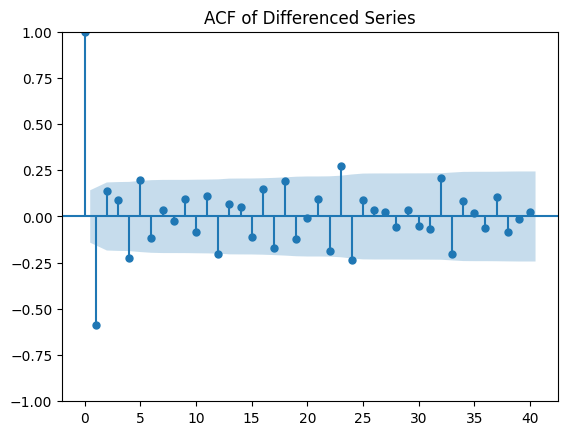

<Figure size 1000x400 with 0 Axes>

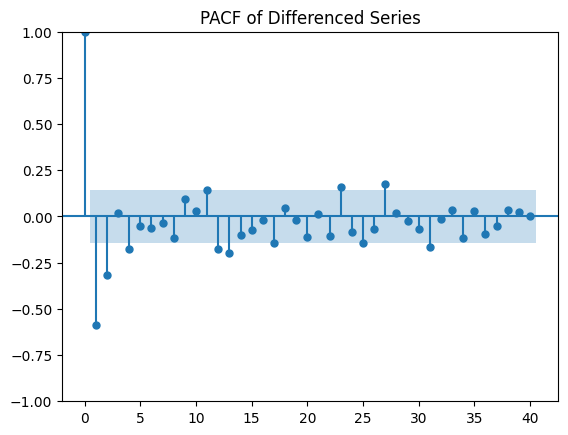

In [23]:
#section4

plt.figure(figsize=(10, 4))
plot_acf(seasonal_diff['cost'], lags=40)
plt.title("ACF of Differenced Series")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(seasonal_diff['cost'], lags=40)
plt.title("PACF of Differenced Series")
plt.show()


In [24]:
#section5

model1 = SARIMAX(ap1['cost'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
model2 = SARIMAX(ap1['cost'], order=(2,1,2), seasonal_order=(0,1,1,12)).fit()

print("Model 1 AIC:", model1.aic)
print("Model 2 AIC:", model2.aic)


chosen_model = model1 if model1.aic < model2.aic else model2


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

Model 1 AIC: -554.6784172937761
Model 2 AIC: -560.0804623577926


In [26]:
train = ap1.iloc[:-12]
test = ap1.iloc[-12:]

MAE: 0.04185073320965834
MAPE: 4.766863807055979
MSE: 0.0023554256111892008


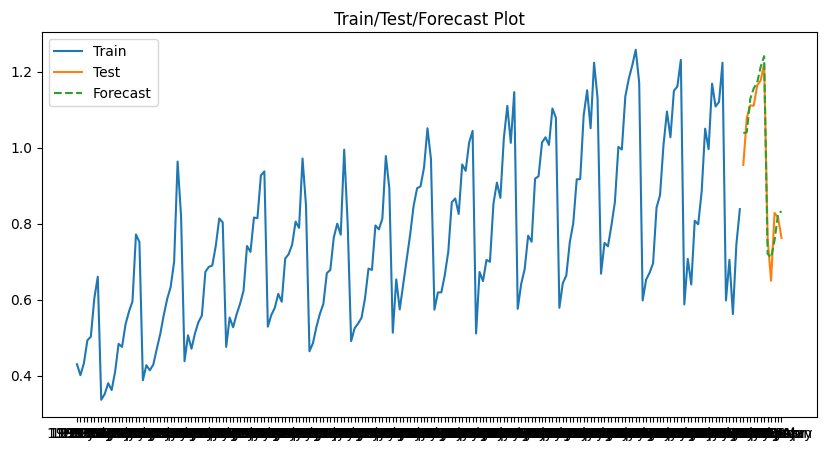

In [27]:
#section6

forecast_result = chosen_model.get_forecast(steps=12)
forecast_mean = forecast_result.predicted_mean

mae = mean_absolute_error(test, forecast_mean)
mape = np.mean(np.abs((test.values.flatten() - forecast_mean.values) / test.values.flatten())) * 100
mse = mean_squared_error(test, forecast_mean)

print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['cost'], label='Train')
plt.plot(test.index, test['cost'], label='Test')
plt.plot(test.index, forecast_mean, label='Forecast', linestyle='--')
plt.legend()
plt.title("Train/Test/Forecast Plot")
plt.show()


In [32]:
#section7

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, HoltWinters, AutoTheta, MSTL


df = ap1.reset_index()
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['unique_id'] = 'series_1'


sf = StatsForecast(
    models=[
        AutoARIMA(season_length=12),
        AutoETS(season_length=12),
        HoltWinters(season_length=12),
        AutoTheta(season_length=12),
        MSTL(season_length=12)
    ],
    freq='MS',
    n_jobs=-1
)


forecast_df = sf.forecast(df=df, h=12)
forecast_df.head()


<ipython-input-32-dcef18f2c6ab>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


,unique_id,ds,AutoARIMA,AutoETS,HoltWinters,AutoTheta,MSTL
0,series_1,2008-07-01,1.030063,0.941744,0.966938,0.947466,0.963868
1,series_1,2008-08-01,1.007223,0.994053,1.079332,1.010625,1.034552
2,series_1,2008-09-01,1.102301,1.047695,1.107029,1.068389,1.091474
3,series_1,2008-10-01,1.155966,1.107990,1.148039,1.126294,1.141776
4,series_1,2008-11-01,1.143878,1.123985,1.171523,1.147741,1.155327


In [35]:
#sectionBonus for compairing all MSE models
from sklearn.metrics import mean_squared_error


true_values = test['cost'].values

preds = forecast_df[forecast_df['unique_id'] == 'series_1']

mse_scores = {}

for model in ['AutoARIMA', 'AutoETS', 'HoltWinters', 'AutoTheta', 'MSTL']:
    predicted = preds[model].values
    mse = mean_squared_error(true_values, predicted)
    mse_scores[model] = mse

print("MSE per model:")
for model, score in mse_scores.items():
    print(f"{model}: {score:.5f}")


MSE per model:
AutoARIMA: 0.00249
AutoETS: 0.00449
HoltWinters: 0.00174
AutoTheta: 0.00472
MSTL: 0.00303


In [36]:
#graph for comparing all models
!pip install statsforecast

<ipython-input-37-a46be79e26af>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


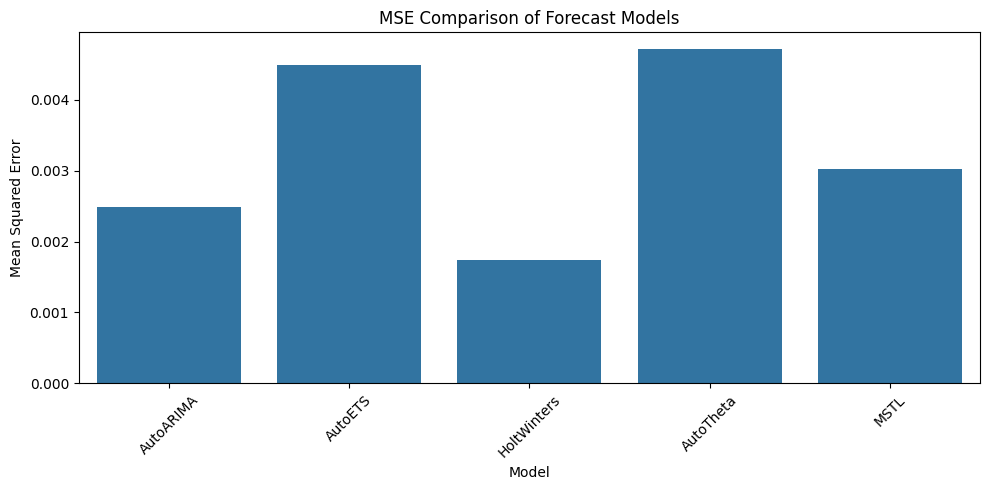

In [37]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, HoltWinters, AutoTheta, MSTL
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')
ap1.columns = ['cost']
df = ap1.reset_index()
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['unique_id'] = 'series_1'

sf = StatsForecast(
    models=[
        AutoARIMA(season_length=12),
        AutoETS(season_length=12),
        HoltWinters(season_length=12),
        AutoTheta(season_length=12),
        MSTL(season_length=12)
    ],
    freq='MS',
    n_jobs=-1
)
forecast_df = sf.forecast(df=df, h=12)

test = ap1.iloc[-12:]
preds = forecast_df[forecast_df['unique_id'] == 'series_1']
mse_scores = {
    model: mean_squared_error(test['cost'].values, preds[model].values)
    for model in ['AutoARIMA', 'AutoETS', 'HoltWinters', 'AutoTheta', 'MSTL']
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()))
plt.title("MSE Comparison of Forecast Models")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
